In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# Purchase data

In [2]:
# Load purchase data
purchase_data_df = pd.read_csv('purchase_data.csv')
purchase_data_df.head(10)

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time
0,Purchase_948,User_3840,Product_19,62.843031,2023-04-02 16:35:46
1,Purchase_905,User_1846,Product_9,21.780079,2023-04-14 16:38:27
2,Purchase_704,User_1700,Product_8,138.264455,2023-01-21 11:21:31
3,Purchase_766,User_4117,Product_15,74.991367,2023-01-29 04:44:04
4,Purchase_36,User_3053,Product_7,162.569998,2023-05-24 03:30:23
5,Purchase_982,User_3759,Product_16,49.945558,2023-01-29 22:34:04
6,Purchase_950,User_4573,Product_18,181.501507,2023-07-24 06:13:14
7,Purchase_599,User_3228,Product_12,46.880509,2023-03-22 01:31:48
8,Purchase_613,User_691,Product_11,104.729904,2023-06-19 08:35:13
9,Purchase_81,User_940,Product_19,98.921151,2023-03-06 06:43:11


In [3]:
# shape
purchase_data_df.shape

(1000, 5)

In [4]:
# size
purchase_data_df.size

5000

In [5]:
#info
purchase_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Purchase_ID         1000 non-null   object 
 1   User_ID             1000 non-null   object 
 2   Product_ID          1000 non-null   object 
 3   Transaction_Amount  1000 non-null   float64
 4   Purchase_Time       1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [6]:
#describe
purchase_data_df.describe()

,Transaction_Amount
count,1000.000000
mean,106.348744
std,55.951244
min,10.429825
25%,58.426058
50%,102.950857
75%,157.533495
max,199.961345


In [7]:
# check for missing / null values
purchase_data_df.isnull().sum()

Purchase_ID           0
User_ID               0
Product_ID            0
Transaction_Amount    0
Purchase_Time         0
dtype: int64

In [8]:
(purchase_data_df.isna().sum()/purchase_data_df.shape[0])*100

Purchase_ID           0.0
User_ID               0.0
Product_ID            0.0
Transaction_Amount    0.0
Purchase_Time         0.0
dtype: float64

In [10]:
# Identify top-selling products and product categories
top_selling_products = purchase_data_df['Product_ID'].value_counts().head(5)

print("Top Selling Products:")
print(top_selling_products)

Top Selling Products:
Product_19    66
Product_13    59
Product_4     58
Product_20    58
Product_7     56
Name: Product_ID, dtype: int64


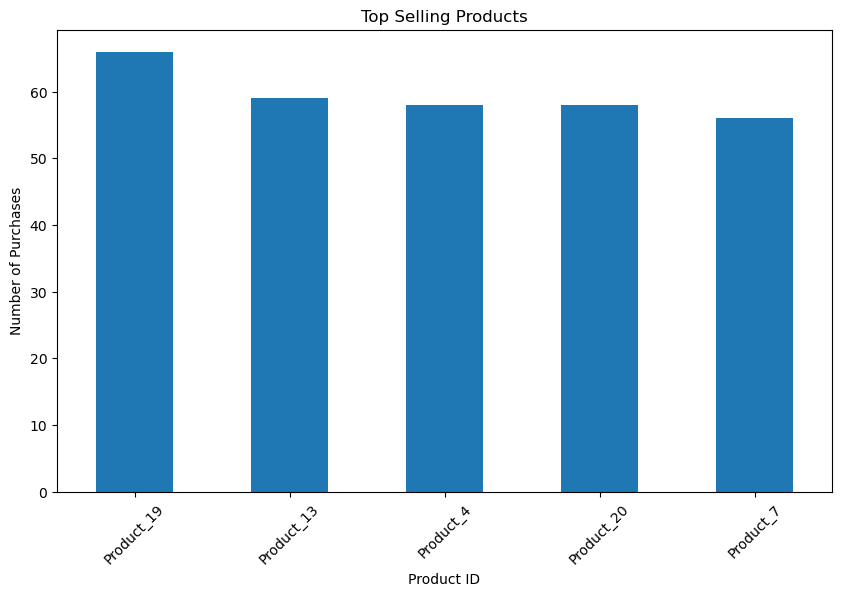

In [15]:
import matplotlib.pyplot as plt

# Plot the top-selling products
plt.figure(figsize=(10, 6))
top_selling_products.plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('Number of Purchases')
plt.title('Top Selling Products')
plt.xticks(rotation=45)
plt.show()


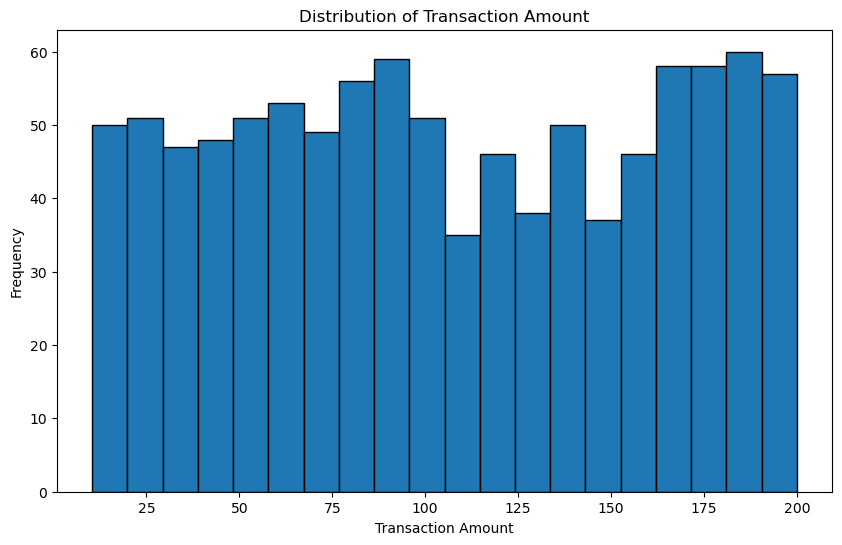

In [16]:
import matplotlib.pyplot as plt

# Plot histogram for transaction amount
plt.figure(figsize=(10, 6))
plt.hist(purchase_data_df['Transaction_Amount'], bins=20, edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amount')
plt.show()


In [17]:
import matplotlib.dates as mdates

# Convert the 'Purchase_Time' column to datetime format
purchase_data_df['Purchase_Time'] = pd.to_datetime(purchase_data_df['Purchase_Time'])
purchase_data_df['Purchase_Time']

0     2023-04-02 16:35:46
1     2023-04-14 16:38:27
2     2023-01-21 11:21:31
3     2023-01-29 04:44:04
4     2023-05-24 03:30:23
              ...        
995   2023-04-10 17:38:54
996   2023-02-19 15:05:57
997   2023-07-14 23:15:18
998   2023-03-03 15:37:35
999   2023-02-18 17:47:48
Name: Purchase_Time, Length: 1000, dtype: datetime64[ns]

In [18]:
# Group transactions by date and count the number of transactions per day
transactions_by_date = purchase_data_df.set_index('Purchase_Time').resample('D')['Purchase_ID'].count()
transactions_by_date

Purchase_Time
2023-01-01    3
2023-01-02    7
2023-01-03    6
2023-01-04    4
2023-01-05    3
             ..
2023-07-25    6
2023-07-26    5
2023-07-27    6
2023-07-28    4
2023-07-29    1
Freq: D, Name: Purchase_ID, Length: 210, dtype: int64

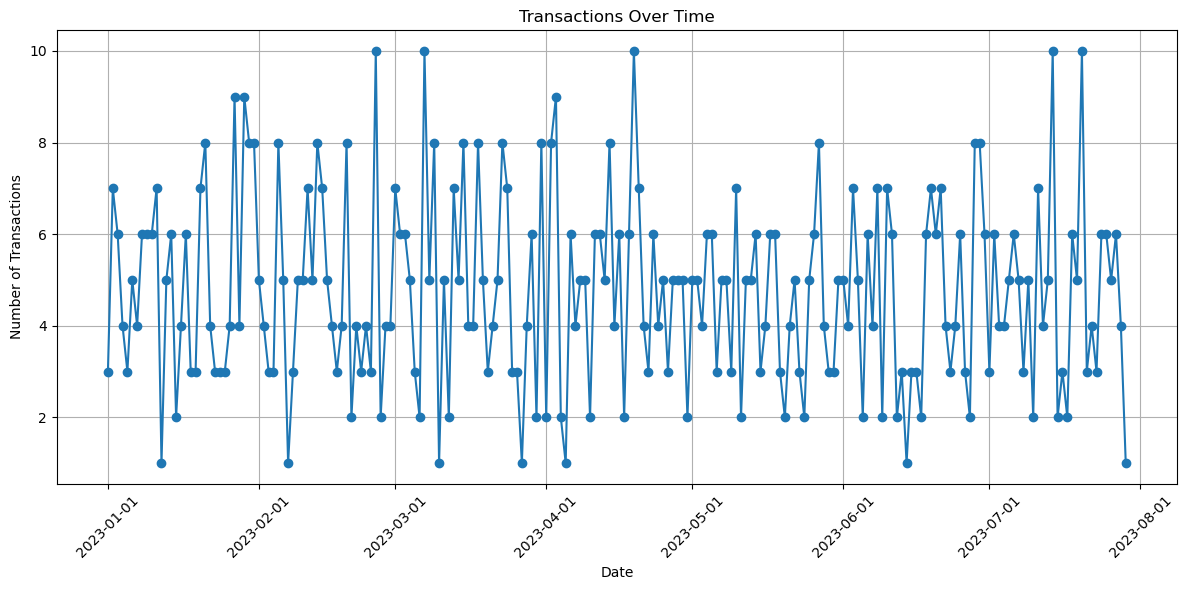

In [19]:
# Plot time series line plot for transactions over time
plt.figure(figsize=(12, 6))
plt.plot(transactions_by_date.index, transactions_by_date.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Transactions Over Time')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# User Intractions Data


In [22]:
# Load data from CSV files
user_interactions_df = pd.read_csv('user_interactions.csv')
user_interactions_df.head(10)

,User_ID,Page_Viewed,Time_Spent_Seconds
0,User_3198,Homepage,560
1,User_126,Category Page,168
2,User_1376,Category Page,122
3,User_1117,Cart Page,329
4,User_3683,Category Page,391
5,User_3384,Homepage,44
6,User_4461,Cart Page,146
7,User_435,Cart Page,335
8,User_2110,Checkout Page,570
9,User_149,Homepage,481


In [23]:
# shape
user_interactions_df.shape

(5000, 3)

In [24]:
# size 
user_interactions_df.size

15000

In [25]:
#info
user_interactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User_ID             5000 non-null   object
 1   Page_Viewed         5000 non-null   object
 2   Time_Spent_Seconds  5000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [26]:
#describe
user_interactions_df.describe()

,Time_Spent_Seconds
count,5000.000000
mean,304.508800
std,168.978666
min,10.000000
25%,160.000000
50%,301.000000
75%,452.000000
max,599.000000


In [27]:
#check for missing values/ Null values
user_interactions_df.isnull().sum()

User_ID               0
Page_Viewed           0
Time_Spent_Seconds    0
dtype: int64

In [28]:
# Calculate total page views and average time spent on each page
page_views = user_interactions_df['Page_Viewed'].value_counts()
page_views

Homepage         1045
Cart Page        1041
Checkout Page     989
Category Page     972
Product Page      953
Name: Page_Viewed, dtype: int64

In [29]:
avg_time_spent = user_interactions_df.groupby('Page_Viewed')['Time_Spent_Seconds'].mean()
avg_time_spent

Page_Viewed
Cart Page        302.819404
Category Page    297.839506
Checkout Page    306.760364
Homepage         310.215311
Product Page     304.562434
Name: Time_Spent_Seconds, dtype: float64

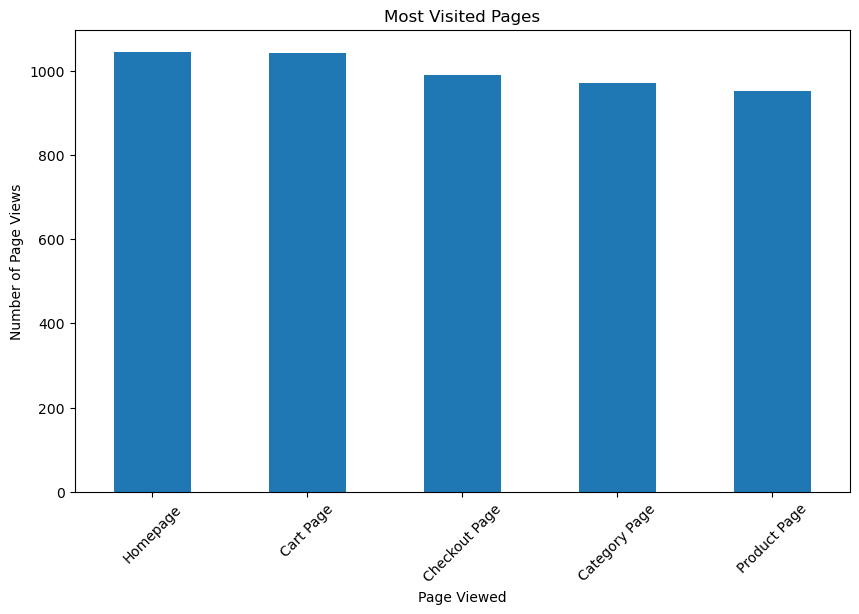

In [30]:
# Create visualizations
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
page_views.plot(kind='bar')
plt.xlabel('Page Viewed')
plt.ylabel('Number of Page Views')
plt.title('Most Visited Pages')
plt.xticks(rotation=45)
plt.show()

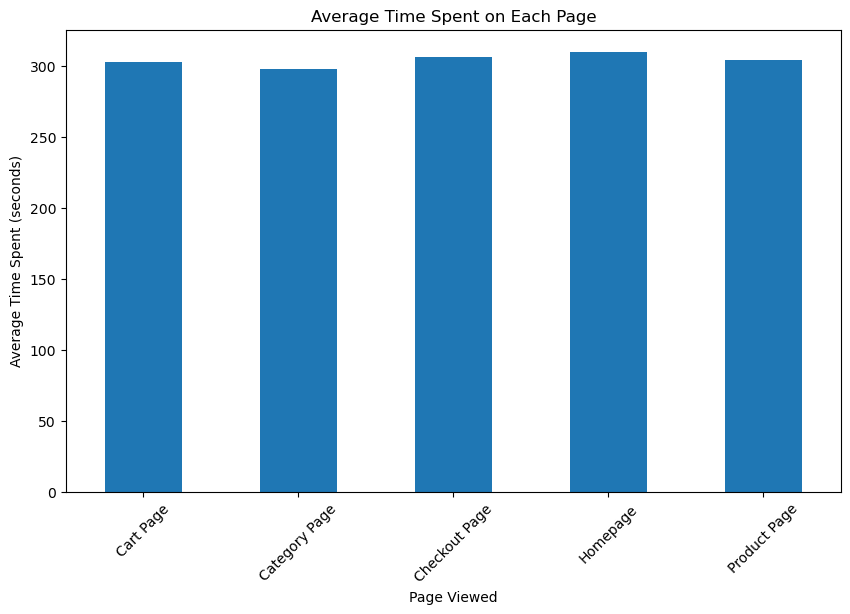

In [31]:
plt.figure(figsize=(10, 6))
avg_time_spent.plot(kind='bar')
plt.xlabel('Page Viewed')
plt.ylabel('Average Time Spent (seconds)')
plt.title('Average Time Spent on Each Page')
plt.xticks(rotation=45)
plt.show()

In [32]:
# Calculate click-through rate for different sections
click_through_rate = user_interactions_df.groupby('Page_Viewed')['User_ID'].count() / len(user_interactions_df)
click_through_rate

Page_Viewed
Cart Page        0.2082
Category Page    0.1944
Checkout Page    0.1978
Homepage         0.2090
Product Page     0.1906
Name: User_ID, dtype: float64

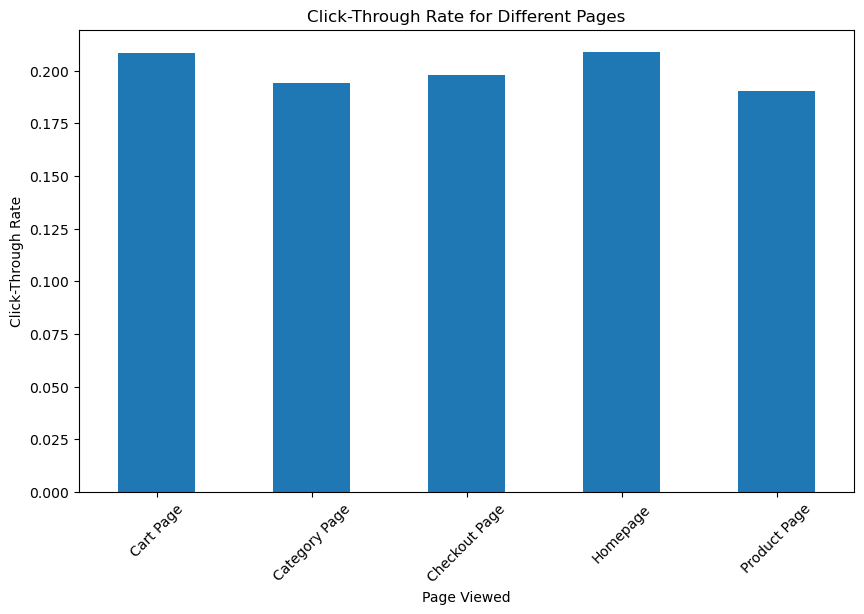

In [33]:
# Create a bar plot for click-through rate
plt.figure(figsize=(10, 6))
click_through_rate.plot(kind='bar')
plt.xlabel('Page Viewed')
plt.ylabel('Click-Through Rate')
plt.title('Click-Through Rate for Different Pages')
plt.xticks(rotation=45)
plt.show()

In [34]:
# Calculate bounce rate (percentage of users who visited only one page)
bounce_rate = (user_interactions_df['Page_Viewed'].value_counts() == 1).mean()

print(f"Bounce Rate: {bounce_rate:.2%}")

Bounce Rate: 0.00%


In [35]:
# Calculate overall conversion rate
conversion_rate = len(purchase_data_df['User_ID'].unique()) / len(user_interactions_df['User_ID'].unique())

print(f"Overall Conversion Rate: {conversion_rate:.2%}")

Overall Conversion Rate: 28.54%


In [36]:
# Merge user interactions and purchase data on 'User_ID' to link the two datasets
merged_data = pd.merge(user_interactions_df, purchase_data_df, on='User_ID', how='left')
merged_data 

,User_ID,Page_Viewed,Time_Spent_Seconds,Purchase_ID,Product_ID,Transaction_Amount,Purchase_Time
0,User_3198,Homepage,560,NaN,NaN,NaN,NaT
1,User_126,Category Page,168,NaN,NaN,NaN,NaT
2,User_1376,Category Page,122,NaN,NaN,NaN,NaT
3,User_1117,Cart Page,329,NaN,NaN,NaN,NaT
4,User_3683,Category Page,391,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...
5085,User_2627,Checkout Page,559,Purchase_616,Product_18,182.407534,2023-02-15 20:37:35
5086,User_2627,Checkout Page,559,Purchase_366,Product_2,73.618684,2023-01-09 21:48:22
5087,User_4976,Product Page,373,NaN,NaN,NaN,NaT
5088,User_1770,Homepage,104,Purchase_309,Product_17,14.886482,2023-01-20 06:11:15


In [37]:
# Check if a purchase occurred for each user interaction
merged_data['Purchase'] = merged_data['Product_ID'].notnull()
merged_data['Purchase']

0       False
1       False
2       False
3       False
4       False
        ...  
5085     True
5086     True
5087    False
5088     True
5089     True
Name: Purchase, Length: 5090, dtype: bool

In [38]:
# Calculate the likelihood of a purchase for each page viewed
purchase_likelihood_by_page = merged_data.groupby('Page_Viewed')['Purchase'].mean()
purchase_likelihood_by_page

Page_Viewed
Cart Page        0.176136
Category Page    0.213065
Checkout Page    0.216056
Homepage         0.190746
Product Page     0.217302
Name: Purchase, dtype: float64

In [39]:
print("Likelihood of a Purchase for Each Page Viewed:")
print(purchase_likelihood_by_page)

Likelihood of a Purchase for Each Page Viewed:
Page_Viewed
Cart Page        0.176136
Category Page    0.213065
Checkout Page    0.216056
Homepage         0.190746
Product Page     0.217302
Name: Purchase, dtype: float64


In [40]:
import seaborn as sns

# Merge purchase data with user interactions data to get the product category for each purchase
merged_data = pd.merge(purchase_data_df, user_interactions_df[['User_ID', 'Page_Viewed']], on='User_ID', how='left')
merged_data

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time,Page_Viewed
0,Purchase_948,User_3840,Product_19,62.843031,2023-04-02 16:35:46,NaN
1,Purchase_905,User_1846,Product_9,21.780079,2023-04-14 16:38:27,Checkout Page
2,Purchase_905,User_1846,Product_9,21.780079,2023-04-14 16:38:27,Category Page
3,Purchase_704,User_1700,Product_8,138.264455,2023-01-21 11:21:31,Checkout Page
4,Purchase_766,User_4117,Product_15,74.991367,2023-01-29 04:44:04,Checkout Page
...,...,...,...,...,...,...
1358,Purchase_741,User_588,Product_1,85.587089,2023-02-19 15:05:57,Category Page
1359,Purchase_741,User_588,Product_1,85.587089,2023-02-19 15:05:57,Product Page
1360,Purchase_587,User_3821,Product_16,162.919467,2023-07-14 23:15:18,Cart Page
1361,Purchase_222,User_1804,Product_10,44.435545,2023-03-03 15:37:35,Cart Page


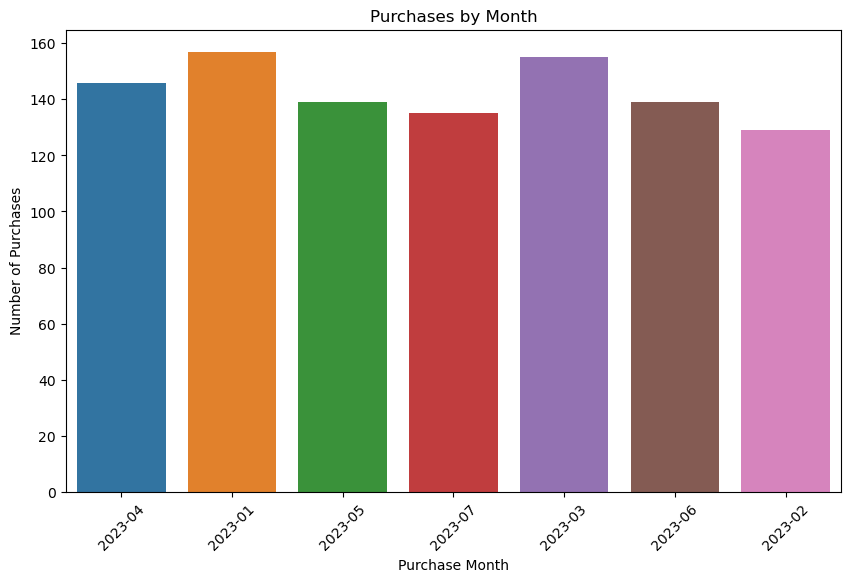

In [42]:
# Convert the 'Purchase_Time' column to datetime format
purchase_data_df['Purchase_Time'] = pd.to_datetime(purchase_data_df['Purchase_Time'])

# Extract the month from the 'Purchase_Time' column
purchase_data_df['Purchase_Month'] = purchase_data_df['Purchase_Time'].dt.to_period('M')

# Create a count plot for purchases by month
plt.figure(figsize=(10, 6))
sns.countplot(x='Purchase_Month', data=purchase_data_df)
plt.xlabel('Purchase Month')
plt.ylabel('Number of Purchases')
plt.title('Purchases by Month')
plt.xticks(rotation=45)
plt.show()


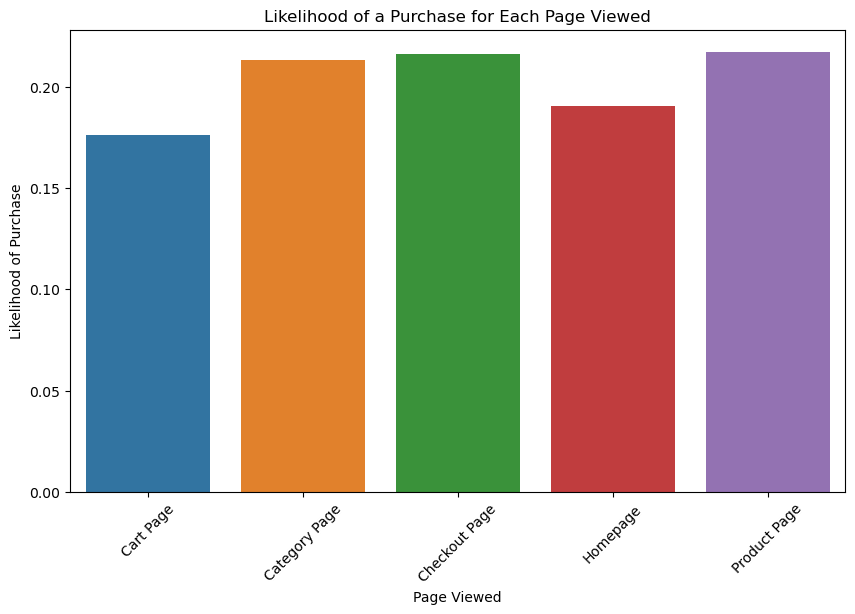

In [43]:
import seaborn as sns

# Plot the likelihood of a purchase for each page viewed
plt.figure(figsize=(10, 6))
sns.barplot(x=purchase_likelihood_by_page.index, y=purchase_likelihood_by_page.values)
plt.xlabel('Page Viewed')
plt.ylabel('Likelihood of Purchase')
plt.title('Likelihood of a Purchase for Each Page Viewed')
plt.xticks(rotation=45)
plt.show()


# Website_performance data

In [44]:
# Load website performance data
website_performance_df = pd.read_csv('website_performance.csv')
website_performance_df

,Month,Page_Load_Time,Bounce_Rate,Conversion_Rate
0,2023-01-01,5.106652,0.514345,0.047375
1,2023-02-01,7.828199,0.317157,0.062764
2,2023-03-01,3.239983,0.480903,0.050514
3,2023-04-01,5.954509,0.473572,0.057151
4,2023-05-01,9.872398,0.542407,0.089525
5,2023-06-01,7.333456,0.440715,0.048687
6,2023-07-01,3.372264,0.390081,0.048440
7,2023-08-01,7.115272,0.489165,0.038263
8,2023-09-01,8.384957,0.301692,0.063365
9,2023-10-01,2.468395,0.566843,0.065971


In [46]:
website_performance_df.shape

(12, 4)

In [47]:
website_performance_df.size

48

In [48]:
website_performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            12 non-null     object 
 1   Page_Load_Time   12 non-null     float64
 2   Bounce_Rate      12 non-null     float64
 3   Conversion_Rate  12 non-null     float64
dtypes: float64(3), object(1)
memory usage: 512.0+ bytes


In [49]:
website_performance_df.describe()

,Page_Load_Time,Bounce_Rate,Conversion_Rate
count,12.000000,12.000000,12.000000
mean,5.866266,0.452650,0.060056
std,2.288288,0.086482,0.014993
min,2.468395,0.301692,0.038263
25%,4.165375,0.389651,0.048626
50%,5.621936,0.477238,0.059957
75%,7.457142,0.517399,0.065832
max,9.872398,0.566843,0.089525


In [51]:
website_performance_df.isnull().sum()

Month              0
Page_Load_Time     0
Bounce_Rate        0
Conversion_Rate    0
dtype: int64

In [55]:
import matplotlib.pyplot as plt

# Convert the 'Month' column to datetime format
website_performance_df['Month'] = pd.to_datetime(website_performance_df['Month'])
website_performance_df['Month']

0    2023-01-01
1    2023-02-01
2    2023-03-01
3    2023-04-01
4    2023-05-01
5    2023-06-01
6    2023-07-01
7    2023-08-01
8    2023-09-01
9    2023-10-01
10   2023-11-01
11   2023-12-01
Name: Month, dtype: datetime64[ns]

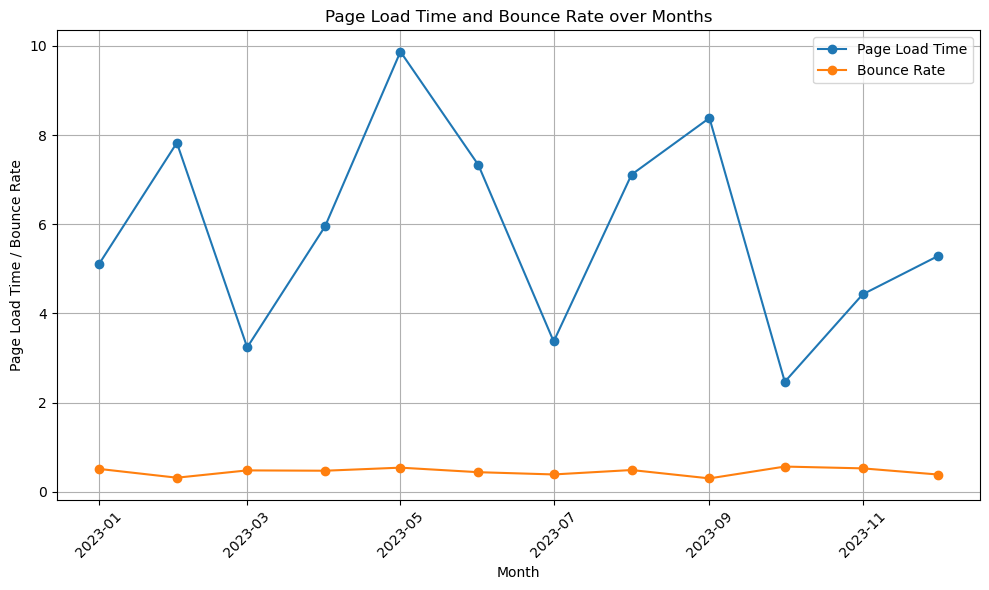

In [56]:
# Plot line plot for page load time and bounce rate over months
plt.figure(figsize=(10, 6))
plt.plot(website_performance_df['Month'], website_performance_df['Page_Load_Time'], label='Page Load Time', marker='o')
plt.plot(website_performance_df['Month'], website_performance_df['Bounce_Rate'], label='Bounce Rate', marker='o')
plt.xlabel('Month')
plt.ylabel('Page Load Time / Bounce Rate')
plt.title('Page Load Time and Bounce Rate over Months')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

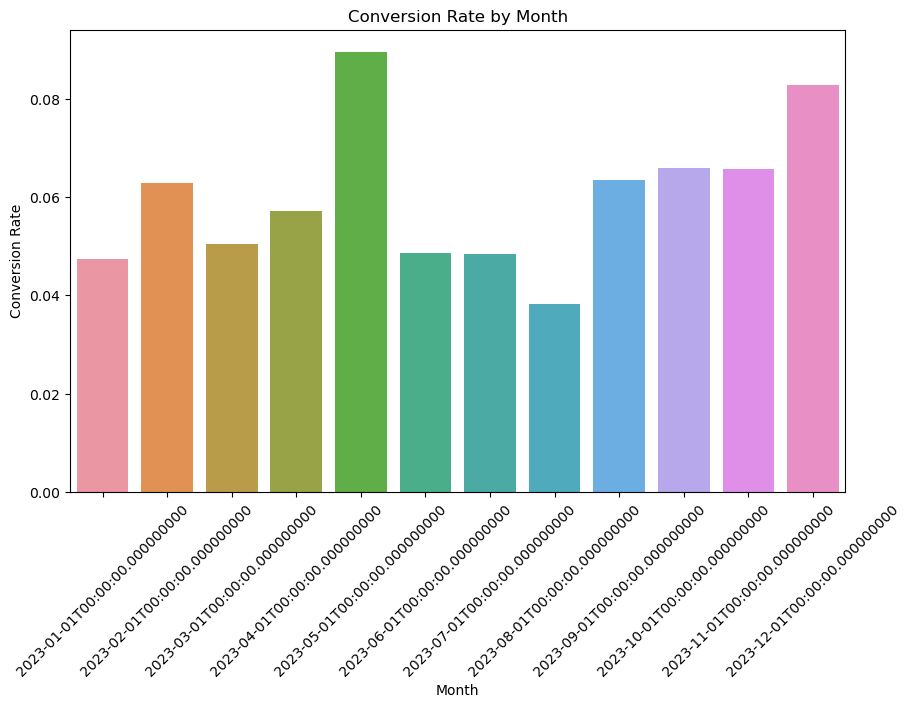

In [57]:
import seaborn as sns

# Plot bar plot for conversion rate by month
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Conversion_Rate', data=website_performance_df)
plt.xlabel('Month')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Month')
plt.xticks(rotation=45)
plt.show()


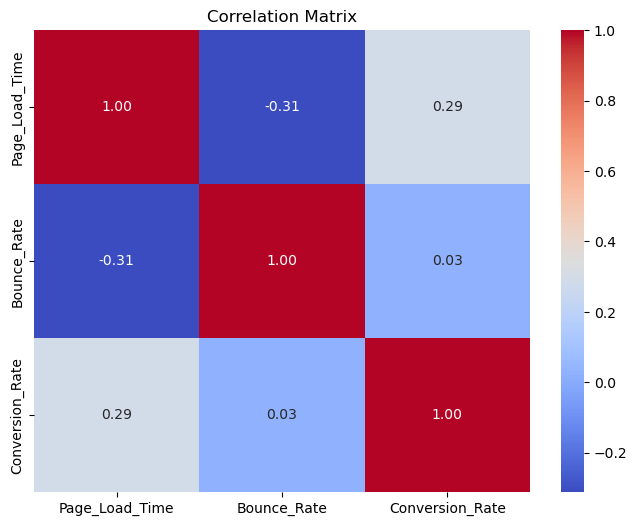

In [58]:
# Calculate the correlation matrix
correlation_matrix = website_performance_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [59]:
# Perform a linear regression analysis to identify trends in website performance metrics over time
from scipy.stats import linregress

In [60]:
slope, intercept, r_value, p_value, std_err = linregress(range(len(website_performance_df)), website_performance_df['Page_Load_Time'])
print("Page Load Time Trend:")
print(f"Slope: {slope}, R-squared: {r_value**2}")

Page Load Time Trend:
Slope: -0.1190828877884952, R-squared: 0.03520632580110567


In [61]:
slope, intercept, r_value, p_value, std_err = linregress(range(len(website_performance_df)), website_performance_df['Bounce_Rate'])
print("\nBounce Rate Trend:")
print(f"Slope: {slope}, R-squared: {r_value**2}")


Bounce Rate Trend:
Slope: 0.00010715560661758541, R-squared: 1.9958047672988408e-05


In [62]:
slope, intercept, r_value, p_value, std_err = linregress(range(len(website_performance_df)), website_performance_df['Conversion_Rate'])
print("\nConversion Rate Trend:")
print(f"Slope: {slope}, R-squared: {r_value**2}")


Conversion Rate Trend:
Slope: 0.0014070654927851637, R-squared: 0.11450450357431387
